# RFM (Recency, Frequency, Monetry values of Customers)

<img src="RFM.jpg" alt="rfm" width="500" height=300/>

Every business is customer focus and every CEO looking to make the best of their business wants to keep loyal customers and stop  not so loyal customers from leaving. RFM becomes important as it helps segment customers into those who are loyal, needs attention and most importantly, customers who you just cant loose.

RFM can be used with customer churn analysis or on its own. I have a data set from adventure works for this project (rather than using a generic one or actual data I had worked on) This data was the cosest thing I could find to real world use and it involve the use of SQL to trim down the data before any analysis.

In [1]:
import pyodbc # for commecting to sql
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from datetime import date
from matplotlib import dates as dates
import datetime as dt
import pyodbc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import seaborn as sns
import random

In [2]:
import squarify

In [3]:
#getting more features form sql
conn = pyodbc.connect('Driver={SQL Server};'
'Server=DESKTOP-******;'
'Database=AdventureWorksDW2017;'
'Trusted_Connection=yes;')
sql_for_df = "select CustomerKey,SalesOrderNumber,SalesAmount,ProductStandardCost,OrderQuantity, SalesAmount-ProductStandardCost as Profit, OrderDate from dbo.FactInternetSales"
sale = pd.read_sql(sql_for_df , conn)
conn.close()

C:\Users\anuma\AppData\Local\Temp\ipykernel_10512\1937802191.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [4]:
sale.head() #data containg sales and orders from costomers from SQL

,CustomerKey,SalesOrderNumber,SalesAmount,ProductStandardCost,OrderQuantity,Profit,OrderDate
0,21768,SO43697,3578.2700,2171.2942,1,1406.9758,2010-12-29
1,28389,SO43698,3399.9900,1912.1544,1,1487.8356,2010-12-29
2,25863,SO43699,3399.9900,1912.1544,1,1487.8356,2010-12-29
3,14501,SO43700,699.0982,413.1463,1,285.9519,2010-12-29
4,11003,SO43701,3399.9900,1912.1544,1,1487.8356,2010-12-29


In [7]:
sale.dtypes

CustomerKey                     int64
SalesOrderNumber               object
SalesAmount                   float64
ProductStandardCost           float64
OrderQuantity                   int64
Profit                        float64
OrderDate              datetime64[ns]
dtype: object

In [8]:
sale.isnull().sum() #cheaking for null values

CustomerKey            0
SalesOrderNumber       0
SalesAmount            0
ProductStandardCost    0
OrderQuantity          0
Profit                 0
OrderDate              0
dtype: int64

In [9]:
sale.shape

(60398, 7)

In [10]:
# --Group data by customerKey--
# Create TotalSum column for salesamountt
sale['TotalSum'] = sale['OrderQuantity'] * sale['SalesAmount']

# Create snapshot date
snapshot_date =sale['OrderDate'].max() + timedelta(days=1)
print(snapshot_date)

# Grouping by CustomerID
df =sale.groupby(['CustomerKey']).agg({
        'OrderDate': lambda x: (snapshot_date - x.max()).days,
        'SalesOrderNumber': 'count',
        'TotalSum': 'sum'})

# Rename the columns 
df.rename(columns={'OrderDate': 'Recency',
                         'SalesOrderNumber': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

2014-01-29 00:00:00


In [13]:
# Print top 5 rows and shape of dataframe
print(df.head())
print('{:,} rows; {:,} columns'
      .format(df.shape[0], df.shape[1]))

             Recency  Frequency  MonetaryValue
CustomerKey                                   
11000            271          8        8248.99
11001             50         11        6383.88
11002            340          4        8114.04
11003            264          9        8139.29
11004            273          6        8196.01
18,484 rows; 3 columns


In [14]:
# now we have grouped every customer and know how oftrnthey visit, when last they visited and how much they have spent

C:\Users\anuma\AppData\Local\Temp\ipykernel_10512\1129273297.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\anuma\AppData\Local\Temp\ipykernel_10512\1129273297.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\anuma\AppData\Local\Temp\ipykernel_10512\1129273297.py:8: UserWarning:



`distplot` is

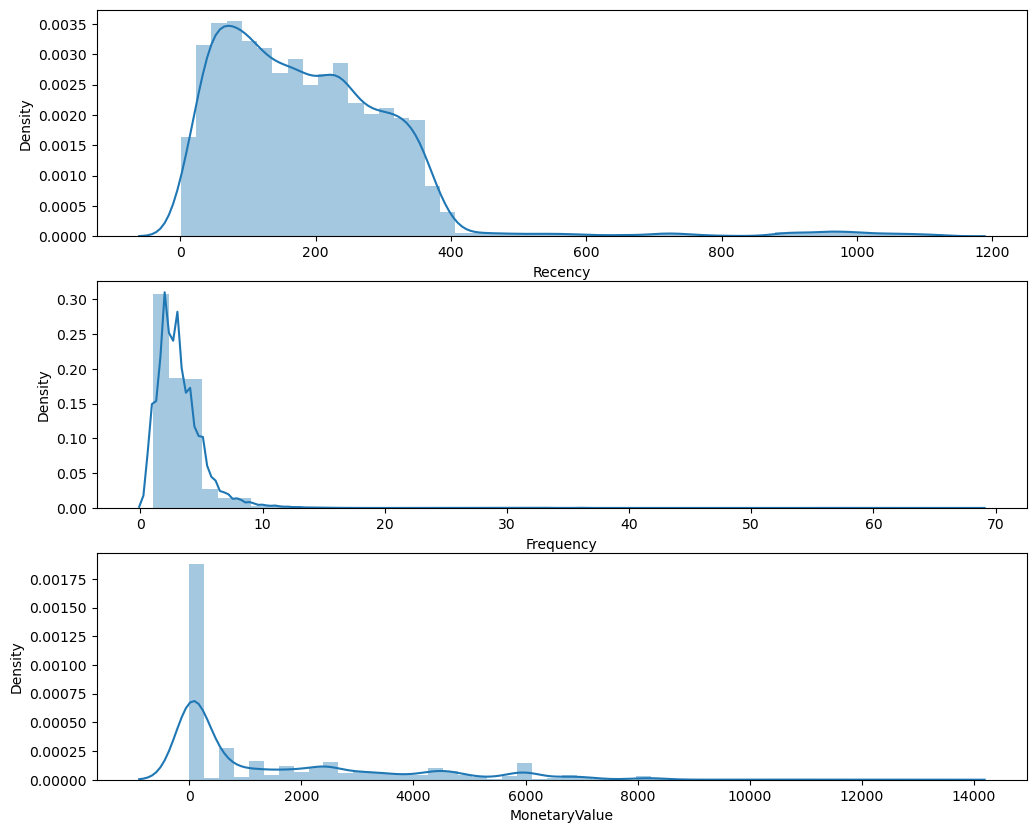

In [15]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(df['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(df['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(df['MonetaryValue'])
# Show the plot
plt.show()

In [18]:

# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(df['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(df['Frequency'], q=4, labels=f_labels)
# Create new columns R and F 
df = df.assign(R = r_groups.values, F = f_groups.values)
df.head()

,Recency,Frequency,MonetaryValue,R,F
CustomerKey,,,,,
11000,271,8,8248.99,1,4
11001,50,11,6383.88,4,4
11002,340,4,8114.04,1,3
11003,264,9,8139.29,2,4
11004,273,6,8196.01,1,4


In [19]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(df['MonetaryValue'], q=4, labels=m_labels)
# Create new column M
df = df.assign(M = m_groups.values)

In [20]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
df['RFM_Segment_Concat'] = df.apply(join_rfm, axis=1)
rfm = df
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
CustomerKey,,,,,,,
11000,271,8,8248.99,1,4,4,1.04.04.0
11001,50,11,6383.88,4,4,4,4.04.04.0
11002,340,4,8114.04,1,3,4,1.03.04.0
11003,264,9,8139.29,2,4,4,2.04.04.0
11004,273,6,8196.01,1,4,4,1.04.04.0


In [21]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

64


In [22]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

CustomerKey
11000     9
11001    12
11002     8
11003    10
11004     9
Name: RFM_Score, dtype: int64


In [23]:
# Define rfm_level function
def rfm_level(ds):
    if ds['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((ds['RFM_Score'] >= 8) and (ds['RFM_Score'] < 9)):
        return 'Champions'
    elif ((ds['RFM_Score'] >= 7) and (ds['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((ds['RFM_Score'] >= 6) and (ds['RFM_Score'] < 7)):
        return 'Potential'
    elif ((ds['RFM_Score'] >= 5) and (ds['RFM_Score'] < 6)):
        return 'Promising'
    elif ((ds['RFM_Score'] >= 4) and (ds['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
CustomerKey,,,,,,,,,
11000,271,8,8248.99,1,4,4,1.04.04.0,9,Can't Loose Them
11001,50,11,6383.88,4,4,4,4.04.04.0,12,Can't Loose Them
11002,340,4,8114.04,1,3,4,1.03.04.0,8,Champions
11003,264,9,8139.29,2,4,4,2.04.04.0,10,Can't Loose Them
11004,273,6,8196.01,1,4,4,1.04.04.0,9,Can't Loose Them


In [24]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can't Loose Them     116.9       5.3        3318.5  5445
Champions            151.3       3.3        1744.5  2515
Loyal                178.0       2.9        1248.0  2508
Needs Attention      255.7       1.9          39.4  1490
Potential            235.1       2.2         830.9  3022
Promising            258.4       2.0         473.5  2490
Require Activation   315.3       1.6          22.9  1014


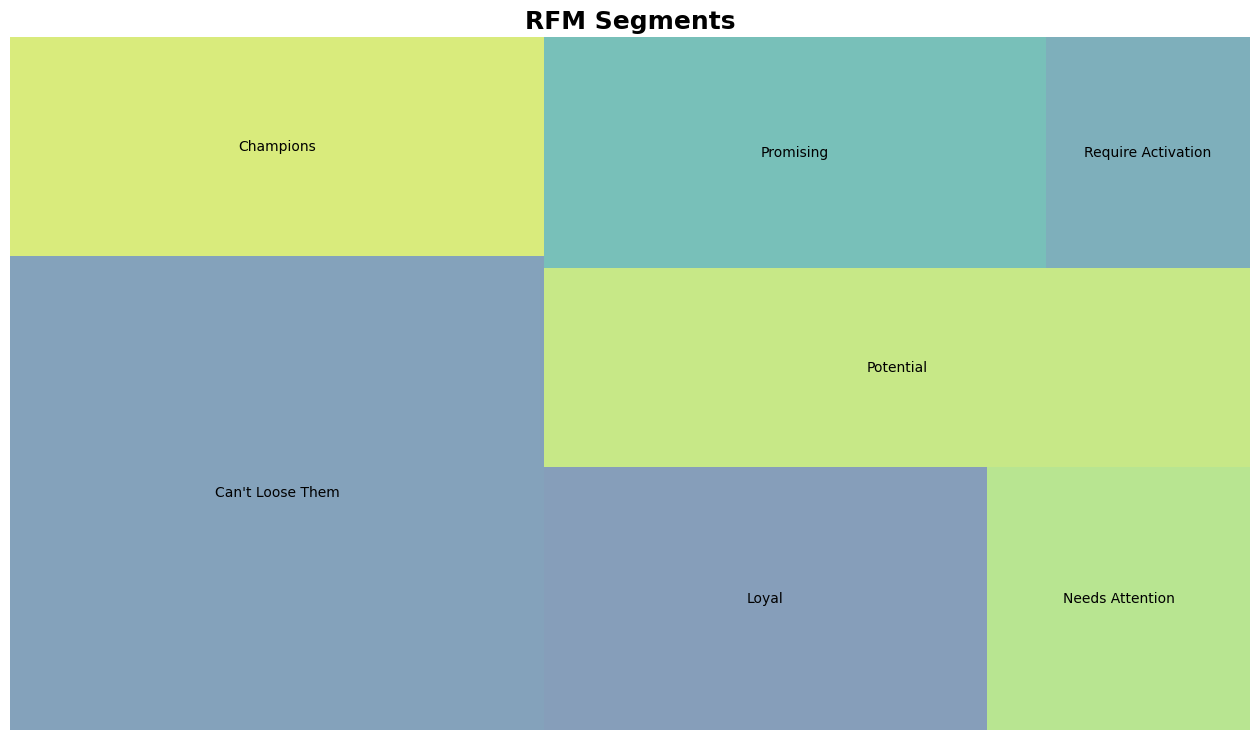

In [25]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()


In [ ]:
# using this information, a company can segment customers based on their purchasing behavior, 
#providing insights for businesses to better understand and engage with their customers